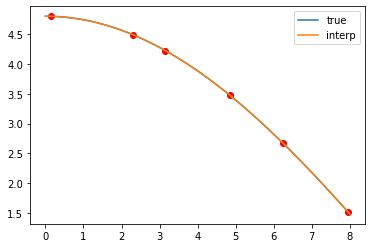

[ 4.79867000e+00 -1.43506977e-01 -5.64113999e-02  1.22866419e-03
  1.04432831e-04 -2.30081528e-06]


In [1]:
from Newton import compute_coeffs, horner
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

x_data = [0.15, 2.30, 3.15, 4.85, 6.25, 7.95]
y_data = [4.79867, 4.49013, 4.2243, 3.47313, 2.66674, 1.51909]

c = compute_coeffs(y_data, x_data)

fig, ax = plt.subplots()

x = np.linspace(0,8,1000)
y = 4.8 * np.cos(np.pi * x / 20)
py = horner(c, x, x_data)

ax.plot(x,y,label="true")
ax.plot(x,py,label="interp")
ax.scatter(x_data, y_data,color='r')
ax.legend()
plt.show()

error = np.abs(y-py)

data = np.column_stack((x, y, py, error))
np.savetxt('newton_interp.csv', data, header='x,f,p,error', comments='', delimiter=',')
np.savetxt('samples.csv', np.column_stack((x_data, y_data)), header='x,y', comments='', delimiter=',')

test_data = np.arange(0,8.5,0.5)

ft = 4.8 * np.cos(np.pi * test_data / 20)
pt = horner(c, test_data, x_data)
df = DataFrame({
    'f': ft,
    'p': pt,
    'error': np.abs(ft-pt)
})

# print(df.to_latex())
print(c)